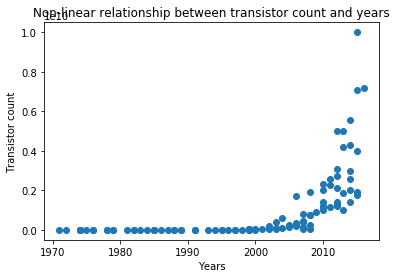

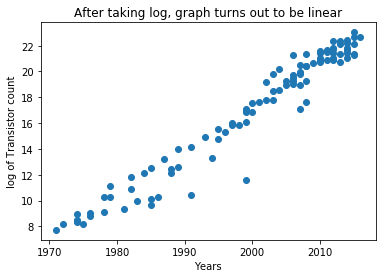

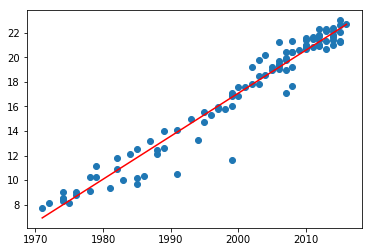

m: 0.351043573365 c: -685.000284382
The R squared is: 0.952944285229
time to double 1.97453317238 years


In [7]:
import re                                 #importing package for regular expressions
import numpy as np                        #import numpy to make matrix and vector computations easier
import matplotlib.pyplot as plt           #import matplotlib.pyplot to visualize the vectors on graphs

X = []                                    #making empty X list for the input vector
Y = []                                    #making empty Y list for the output vector

non_decimal = re.compile(r'[^\d]+')       #using regular expressions for splitting the data and then substituting it with other values
for line in open("moore.csv"):
    r = line.split('\t')
    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    
    X.append(x)
    Y.append(y)

X = np.array(X)                           #converting X into numpy array
Y = np.array(Y)                           #converting Y into numpy array

plt.scatter(X, Y)                         #making scatter plot of X and Y to see the relationship between them
plt.title('Non-linear relationship between transistor count and years')
plt.xlabel('Years')
plt.ylabel('Transistor count')
plt.show()

Y = np.log(Y)                             #Since Y = a*2^X, taking the log of Y and then drawing the scatter plot of logY and X.
plt.scatter(X, Y)
plt.title('After taking log, graph turns out to be linear')
plt.xlabel('Years')
plt.ylabel('log of Transistor count')
plt.show()

denom = X.dot(X) - X.mean()*X.sum()       #Calculating m and c and then finding predicted Y or Yhat
m = (X.dot(Y)-Y.mean()*X.sum())/denom
c = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y))/denom

Yhat = m*X + c                            #Calculating Yhat

plt.scatter(X, Y)                         
plt.plot(X, Yhat, color='red')
plt.show()

diff1 = Y - Yhat                          #Calculating Rsquare
diff2 = Y - Y.mean()
rsquare = 1 - (diff1.dot(diff1)/diff2.dot(diff2))
print("m:", m, "c:", c)
print("The R squared is:", rsquare)

#log(t) = m*year + c
#t = e^(m*year + c)
#2*t = 2*e^(m*year)e^c
#2*t = e^(log2)*e^(m*year)e^c = e^(c)*e^(m*year+log2)
#exp(c)*exp(m*year2) = exp(c)*exp(m*year1+log2)
#m*year2 = m*year1 + log2
#year2 = year1 + log2/m
print("time to double", np.log(2)/m, "years")
